### importing libraries

In [120]:
import os,pathlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from  tensorflow.keras.preprocessing import image 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

### loading image

In [121]:
dirs=pathlib.Path('./dataset').glob("*")

In [122]:
labels=[]
images=[]
mapping_x_y={}
mapping_y_x={}

In [123]:
for index,folders in enumerate(list(dirs)):
    label=str(folders).split("\\")[-1]
    mapping_x_y[index]=label
    mapping_y_x[label]=index
    print(index)
    cnt=0
    for img in folders.glob("*.jpg"):
        labels.append(index)
        im=image.load_img(img,target_size=(100,100))
        image_vector=image.img_to_array(im)
        images.append(image_vector)
        cnt+=1
    print(label , cnt)    
        

0
Abra 41
1
Aerodactyl 97
2
Diglett 51
3
Dragonair 65


In [124]:
def draw_image(image,label):
    plt.imshow(image)
    plt.title(label)
    plt.show()

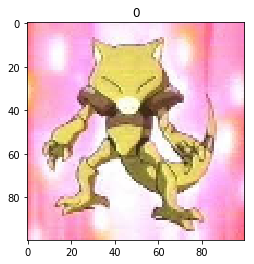

In [125]:
draw_image(images[0]/255,labels[0])

In [126]:
X=np.array(images)
Y=np.array(labels)
X=X.reshape((-1,X.shape[0])).T
X=X/255.0

In [127]:
X.shape , Y.shape

((254, 30000), (254,))

### shuffling data

In [128]:
randomize=np.arange(X.shape[0])
np.random.shuffle(randomize)

In [129]:
X=X[randomize]
Y=Y[randomize]

### Buidling model

In [130]:
model=Sequential()
model.add(Dense(15,activation="relu",input_shape=X[0].shape))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(5,activation="softmax"))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 15)                450015    
_________________________________________________________________
dense_40 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_41 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_42 (Dense)             (None, 5)                 55        
Total params: 450,340
Trainable params: 450,340
Non-trainable params: 0
_________________________________________________________________


In [131]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [132]:
history=model.fit(X,Y,epochs=35)

Train on 254 samples
Epoch 1/35
254/254 [==============================] - 1s 3ms/sample - loss: 2.3146 - accuracy: 0.0433
Epoch 2/35
254/254 [==============================] - 0s 247us/sample - loss: 1.6893 - accuracy: 0.1378
Epoch 3/35
254/254 [==============================] - 0s 263us/sample - loss: 1.4927 - accuracy: 0.4252
Epoch 4/35
254/254 [==============================] - 0s 275us/sample - loss: 1.3504 - accuracy: 0.5709
Epoch 5/35
254/254 [==============================] - 0s 255us/sample - loss: 1.2356 - accuracy: 0.5591
Epoch 6/35
254/254 [==============================] - 0s 255us/sample - loss: 1.1519 - accuracy: 0.6299
Epoch 7/35
254/254 [==============================] - 0s 243us/sample - loss: 1.1290 - accuracy: 0.6850
Epoch 8/35
254/254 [==============================] - 0s 255us/sample - loss: 1.0531 - accuracy: 0.7677
Epoch 9/35
254/254 [==============================] - 0s 243us/sample - loss: 0.9853 - accuracy: 0.7835
Epoch 10/35
254/254 [========================

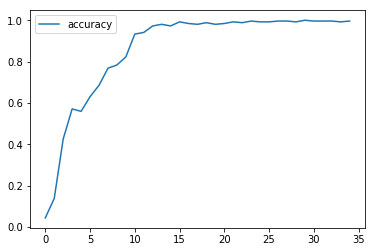

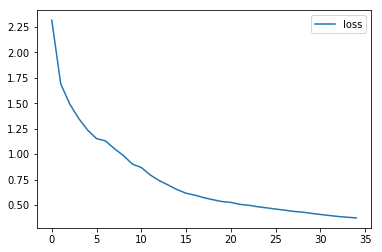

In [133]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'],label='loss')
plt.legend()
plt.show()

In [134]:
Y_pred=model.predict_classes(X)

In [135]:
cf=confusion_matrix(Y,Y_pred)

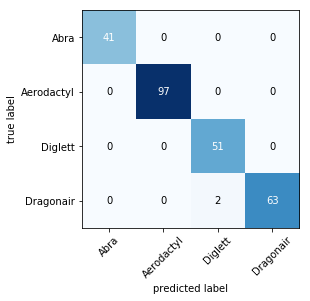

In [136]:
plot_confusion_matrix(cf,class_names=list(mapping_x_y.values()))
plt.show()